# İNSAN KAYNAKLARI ANALİTİĞİ (Supervised - Classification)

Global bir teknoloji şirketi olan TechSolutions, son zamanlarda yetenekli çalışanlarını rakip firmalara kaptırmaya başladı. İK Direktörü, hangi çalışanın işten ayrılma riski taşıdığını önceden bilmek istiyor. Böylece riskli personelle görüşüp onları elde tutmak için (maaş artışı, pozisyon değişikliği vb.) proaktif davranabilirler. Sizden, mevcut çalışan verilerini kullanarak kimin gidici (Attrition: Yes) kimin kalıcı (Attrition: No) olduğunu tahmin eden bir model istiyorlar.

## 1. Gerekli Kütüphanelerin Yüklenmesi

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Veri Setinin Yüklenmesi

In [57]:
!pip install kagglehub[pandas-datasets]

import kagglehub
from kagglehub import KaggleDatasetAdapter

file_path = "WA_Fn-UseC_-HR-Employee-Attrition.csv"

df = kagglehub.dataset_load(
    KaggleDatasetAdapter.PANDAS,
    "pavansubhasht/ibm-hr-analytics-attrition-dataset",
    file_path,
)

df.head(5)

Using Colab cache for faster access to the 'ibm-hr-analytics-attrition-dataset' dataset.


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


## 3. Veri Setinin Boyutu ve Yapısı

In [56]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

## 4. Hedef Değişken `Attrition` Dağılımı

In [61]:
df['Attrition'].value_counts(normalize=True)

,proportion
Attrition,
No,0.838776
Yes,0.161224


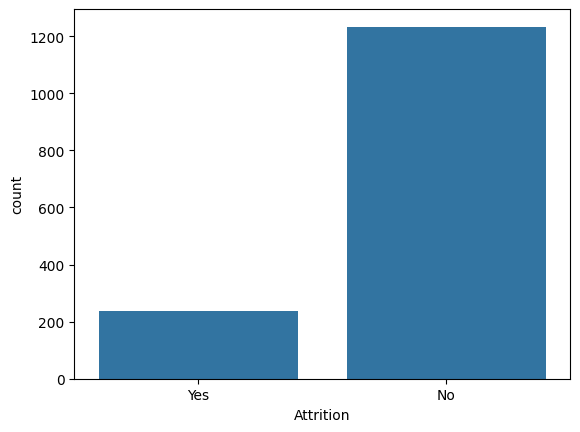

In [60]:
sns.countplot(x='Attrition', data=df)
plt.show()

> Sonuçlar incelendiğinde, çalışanların büyük çoğunluğunun işten ayrılmadığı görülmektedir. Bu durum veri setinde sınıf dengesizliği (class imbalance) olduğunu göstermektedir.

## 5. Label Etiketleme

`Attrition` değişkeni sayısal formata dönüştürülmüştür.  
İşten ayrılanlar `1`, ayrılmayanlar ise `0` olarak etiketlenmiştir.

In [62]:
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})

## 6. Gereksiz Değişkenlerin Kaldırılması

In [63]:
drop_cols = ['EmployeeNumber', 'EmployeeCount', 'Over18', 'StandardHours']
df.drop(columns=drop_cols, inplace=True)

## 7. Değişkenlerin Dönüştürülmesi

In [67]:
cat_cols = df.select_dtypes(include='object').columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

In [68]:
df.shape

(1470, 45)

## 8. Eğitim ve Test Verilerinin Ayrılması

In [71]:
from sklearn.model_selection import train_test_split

X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

## 9. İlk Model Denemesi: Logistic Regression

In [23]:
# from sklearn.linear_model import LogisticRegression

# lr = LogisticRegression(max_iter=1000)
# lr.fit(X_train, y_train)
# y_pred = lr.predict(X_test)
# print(classification_report(y_test, y_pred))

> İlk modelde attrition sınıfı için sınıf dengesizliği nedeniyle düşük recall elde edildiği gözlemlenmiştir.

## 10. Alternatif Model Denemesi: Random Forest

In [72]:
# from sklearn.ensemble import RandomForestClassifier

# rf = RandomForestClassifier(
#     n_estimators=200,
#     random_state=42
# )
# rf.fit(X_train, y_train)
# y_pred_rf = rf.predict(X_test)
# print(classification_report(y_test, y_pred_rf))

> Random Forest modeli, çoğunluk sınıfı üzerinde iyi performans gösterse de
işten ayrılanları tespit etmede (recall) yetersiz kalmıştır.

In [73]:
# from sklearn.metrics import classification_report, confusion_matrix
# print("Logistic Regression")
# print(classification_report(y_test, y_pred_lr))

# print("Random Forest")
# print(classification_report(y_test, y_pred_rf))

In [74]:
# importances = pd.Series(rf.feature_importances_, index=X.columns)
# importances.sort_values(ascending=False).head(10)

In [75]:
# df.shape

## 11. Kullanılan Model: Dengeli Logistic Regression

In [26]:
lr_balanced = LogisticRegression(
    max_iter=1000,
    class_weight='balanced'
)

lr_balanced.fit(X_train, y_train)
y_pred_bal = lr_balanced.predict(X_test)

print(classification_report(y_test, y_pred_bal))

              precision    recall  f1-score   support

           0       0.92      0.73      0.81       247
           1       0.32      0.68      0.44        47

    accuracy                           0.72       294
   macro avg       0.62      0.70      0.63       294
weighted avg       0.83      0.72      0.75       294



/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Class imbalance problemi nedeniyle model olarak dengeli Logistic Regression tercih edilmiştir.

## 12. Confusion Matrix Analizi

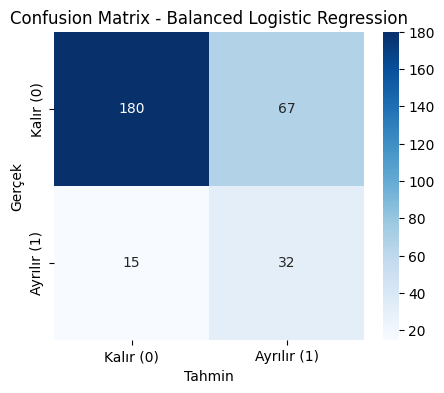

In [76]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_bal)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Kalır (0)', 'Ayrılır (1)'],
            yticklabels=['Kalır (0)', 'Ayrılır (1)'])
plt.xlabel("Tahmin")
plt.ylabel("Gerçek")
plt.title("Confusion Matrix - Balanced Logistic Regression")
plt.show()

> Model, daha fazla çalışanı riskli olarak işaretleme pahasına, ayrılma riski taşıyan çalışanları kaçırma oranını azaltmıştır.

## 13. Model Katsayılarının İncelenmesi

In [77]:
coef_df = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': lr_balanced.coef_[0]
})

coef_df['abs_coef'] = coef_df['Coefficient'].abs()
coef_df.sort_values('abs_coef', ascending=False).head(10)

,Feature,Coefficient,abs_coef
43,OverTime_Yes,0.570064,0.570064
15,StockOptionLevel,-0.419141,0.419141
42,MaritalStatus_Single,0.344303,0.344303
4,EnvironmentSatisfaction,-0.331314,0.331314
26,Department_Sales,0.261877,0.261877
8,JobSatisfaction,-0.259737,0.259737
23,BusinessTravel_Travel_Frequently,0.251484,0.251484
34,JobRole_Laboratory Technician,0.223660,0.223660
13,PerformanceRating,0.220969,0.220969
6,JobInvolvement,-0.191246,0.191246


> Elde edilen sonuçlar incelendiğinde, fazla mesai, gelir düzeyi ve iş memnuniyeti gibi değişkenlerin çalışanların işten ayrılma kararında önemli rol oynadığı görülmektedir.

## 14. Karar Eşiği (Threshold) Analizi

Bu kısımda, Logistic Regression modelinin karar eşiği değiştirilerek işten ayrılan çalışanları tespit etme başarısı (recall) üzerindeki etkisi incelenmiştir.

In [21]:
y_probs = lr_balanced.predict_proba(X_test)[:, 1]

threshold = 0.3
y_pred_03 = (y_probs >= threshold).astype(int)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_03))

              precision    recall  f1-score   support

           0       0.95      0.41      0.58       247
           1       0.22      0.89      0.36        47

    accuracy                           0.49       294
   macro avg       0.59      0.65      0.47       294
weighted avg       0.84      0.49      0.54       294



> Daha düşük bir karar eşiği kullanıldığında, daha fazla çalışan riskli olarak sınıflandırılmakta; bu durum recall değerini artırırken precision değerini düşürmektedir.

## 15. Ortalama Özellik Değerlerinin Hesaplanması

In [36]:
feature_means = X.mean()

> Tahmin fonksiyonunda eksik bırakılan özelliklerin doldurulabilmesi amacıyla eğitim verisindeki özelliklerin ortalama değerleri hesaplanmıştır.

## 16. Çalışan Ayrılma Tahmin Fonksiyonu

Fonksiyon, verilen çalışan özelliklerine göre işten ayrılma tahmini, ayrılma olasılığı ve risk seviyesini birlikte döndürmektedir.

In [99]:
def predict_attrition(employee_data, model, feature_columns, feature_means, threshold=0.5):
    """
    employee_data: dict -> çalışan özellikleri
    model: eğitilmiş ML modeli
    feature_columns: modelin beklediği kolonlar
    feature_means: eğitim verisinin ortalama feature değerleri
    threshold: ayrılma karar eşiği
    """

    # Ortalama değerlerle başlayan dataframe
    employee_df = pd.DataFrame(
        data=[feature_means],
        columns=feature_columns
    )

    # Girilen değerleri yerleştir
    for key, value in employee_data.items():
        if key in employee_df.columns:
            employee_df.loc[0, key] = value

    # Olasılık tahmini
    prob = model.predict_proba(employee_df)[0][1]
    prob_percent = round(prob * 100, 2)

    # Karar
    decision = "Ayrılır" if prob >= threshold else "Kalır"

    # Risk seviyesi
    if prob_percent < 30:
        risk = "Düşük"
    elif prob_percent < 50:
        risk = "Orta"
    else:
        risk = "Yüksek"

    return {
        "Tahmin": decision,
        "Risk Seviyesi": risk,
        "Ayrılma Olasılığı (%)": float(prob_percent)
    }

## 17. Örnek Çalışan Üzerinden Tahmin

- **`Age` (Yaş):**
  18 – 60 aralığında değerler önerilmektedir.

- **`MonthlyIncome` (Aylık Gelir):**
  Yaklaşık 1000 – 20000 aralığında değerler anlamlıdır.
  Düşük gelir seviyeleri ayrılma riskini artırmaktadır.

- **`JobSatisfaction` (İş Memnuniyeti):**
  1 – 4 aralığında kategorik bir değişkendir.
  1: Çok düşük, 4: Çok yüksek memnuniyet seviyesini temsil etmektedir.

- **`OverTime_Yes` (Fazla Mesai):**
  İkili (binary) bir değişkendir.
  1: Fazla mesai var
  0: Fazla mesai yok

In [100]:
employee_high_risk = {
    "Age": 26,
    "MonthlyIncome": 1500,
    "JobSatisfaction": 1,
    "OverTime_Yes": 1
}

predict_attrition(employee_high_risk, lr_balanced, X.columns, feature_means)

{'Tahmin': 'Ayrılır',
 'Risk Seviyesi': 'Yüksek',
 'Ayrılma Olasılığı (%)': 58.08}

In [104]:
employee_medium_risk = {
    "Age": 34,
    "MonthlyIncome": 6000,
    "JobSatisfaction": 2,
    "OverTime_Yes": 1
}

predict_attrition(employee_medium_risk, lr_balanced, X.columns, feature_means)

{'Tahmin': 'Kalır', 'Risk Seviyesi': 'Orta', 'Ayrılma Olasılığı (%)': 49.12}

In [105]:
employee_low_risk = {
    "Age": 45,
    "MonthlyIncome": 9000,
    "JobSatisfaction": 4,
    "OverTime_Yes": 0
}

predict_attrition(employee_low_risk, lr_balanced, X.columns, feature_means)

{'Tahmin': 'Kalır', 'Risk Seviyesi': 'Düşük', 'Ayrılma Olasılığı (%)': 24.62}

Sonuçlar, düşük gelir ve fazla mesai gibi faktörlerin çalışan ayrılma riskini artırdığını göstermektedir.